In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

import nn
from visualize import visualize_net, visualize_genome, display_gene

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: attempted relative import with no known parent package

In [110]:
def dupe_neuron(id, bias):
    return nn.NeuronGene(id, bias), nn.NeuronGene(id, bias + 0.1)

def dupe_synapse(n1a, n1b, n2a, n2b, id, weight, is_on):
    return nn.SynapseGene(id, n1a, n1b, weight, is_on), nn.SynapseGene(id, n2a, n2b, weight + 0.1, is_on)

def make_two_nets():
    a1, a2 = dupe_neuron(1, 0.5)
    b1, b2 = dupe_neuron(2, 0.5)
    c1, c2 = dupe_neuron(3, 0.5)
    d1, d2 = dupe_neuron(4, 0.5)
    e1, e2 = dupe_neuron(5, 0.5)
    f1, f2 = dupe_neuron(6, 0.5)
    ad1, ad2 = dupe_synapse(a1, d1, a2, d2, 1, 0.5, True)
    bd1, bd2 = dupe_synapse(b1, d1, b2, d2, 2, 0.5, True)
    cd1, cd2 = dupe_synapse(c1, d1, c2, d2, 3, 0.5, False)
    ce1, ce2 = dupe_synapse(c1, e1, c2, e2, 4, 0.5, True)
    df1, df2 = dupe_synapse(d1, f1, d2, f2, 5, 0.5, True)
    ef1, ef2 = dupe_synapse(e1, f1, e2, f2, 6, 0.5, True)
    genome1 = nn.NetworkGenome([a1, b1, c1], [f1], [d1, e1], [ad1, bd1, cd1, ce1, df1, ef1])
    genome2 = nn.NetworkGenome([a2, b2, c2], [f2], [d2, e2], [ad2, bd2, cd2, ce2, df2, ef2])
    net1 = nn.Network(genome1)
    net2 = nn.Network(genome2)
    return net1, net2

[[NeuronGene 4] Bias: 0.5, [NeuronGene 5] Bias: 0.5]


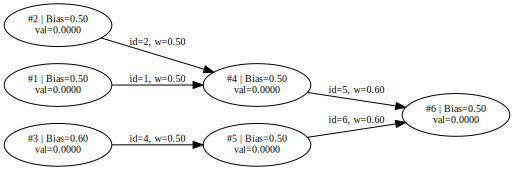

In [111]:
net1, net2 = make_two_nets()
child = nn.NetworkGenome.from_crossover(net2, net1)
child_net = nn.Network(child)
visualize_net(child_net)

In [112]:
net1

Neural Network with 6 neurons, 6 synapses

Neural Network with 5 neurons, 6 synapses


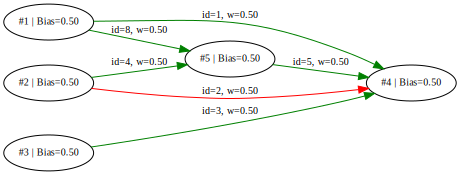

In [113]:
a = nn.NeuronGene(1, 0.5)
b = nn.NeuronGene(2, 0.5)
c = nn.NeuronGene(3, 0.5)
d = nn.NeuronGene(4, 0.5)
e = nn.NeuronGene(5, 0.5)

s1 = nn.SynapseGene(1, a, d, 0.5, True)
s2 = nn.SynapseGene(2, b, d, 0.5, False)
s3 = nn.SynapseGene(3, c, d, 0.5, True)
s4 = nn.SynapseGene(4, b, e, 0.5, True)
s5 = nn.SynapseGene(5, e, d, 0.5, True)
s8 = nn.SynapseGene(8, a, e, 0.5, True)

p1_g = nn.NetworkGenome([a, b, c], [d], [e], [s1, s2, s3, s4, s5, s8])
p1 = nn.Network(p1_g)
print(p1)
# visualize_net(p1, 'BT')
visualize_genome(p1_g, 'LR')

Neural Network with 6 neurons, 9 synapses


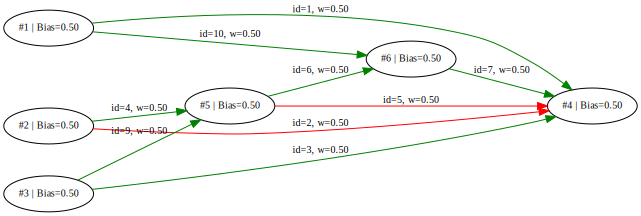

In [114]:
a = nn.NeuronGene(1, 0.5)
b = nn.NeuronGene(2, 0.5)
c = nn.NeuronGene(3, 0.5)
d = nn.NeuronGene(4, 0.5)
e = nn.NeuronGene(5, 0.5)
f = nn.NeuronGene(6, 0.5)

s1 = nn.SynapseGene(1, a, d, 0.5, True)
s2 = nn.SynapseGene(2, b, d, 0.5, False)
s3 = nn.SynapseGene(3, c, d, 0.5, True)
s4 = nn.SynapseGene(4, b, e, 0.5, True)
s5 = nn.SynapseGene(5, e, d, 0.5, False)
s6 = nn.SynapseGene(6, e, f, 0.5, True)
s7 = nn.SynapseGene(7, f, d, 0.5, True)
s9 = nn.SynapseGene(9, c, e, 0.5, True)
s10 = nn.SynapseGene(10, a, f, 0.5, True)

p2_g = nn.NetworkGenome([a, b, c], [d], [e, f], [s1, s2, s3, s4, s5, s6, s7, s9, s10])
p2 = nn.Network(p2_g)
print(p2)
# visualize_net(p2, orientation='BT')
visualize_genome(p2_g, orientation='LR')

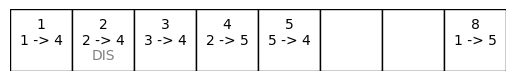

In [120]:
display_gene(p1_g.synapse_gene)

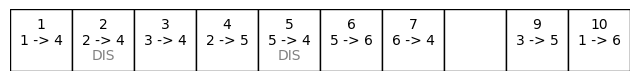

In [119]:
display_gene(p2_g.synapse_gene)

In [127]:
for i in range(5):
    p1_g.synapse_gene[i].weight = 0.4

In [128]:
nn.NetworkGenome.distance(p1_g, p2_g, 1, 1, 1)

5.1

In [93]:
nn.NetworkGenome.NIN = 7
nn.NetworkGenome.SIN = 11

In [94]:
p1_g.mutate()
p2_g.mutate()

[neuron addition mutation] [Neuron 7] @ sg 5
to_disable.outof: [NeuronGene 5] Bias: 0.5
to_disable.into: [NeuronGene 4] Bias: 0.5
[synapse addition mutation] [SynapseGene 13] Neuron 3 -> Neuron 7, Weight: 0.34328098285815634, Enabled
[neuron addition mutation] [Neuron 8] @ sg 10
to_disable.outof: [NeuronGene 1] Bias: 0.5
to_disable.into: [NeuronGene 6] Bias: 0.5
[synapse addition mutation] [SynapseGene 16] Neuron 2 -> Neuron 6, Weight: 0.1357483336492339, Enabled


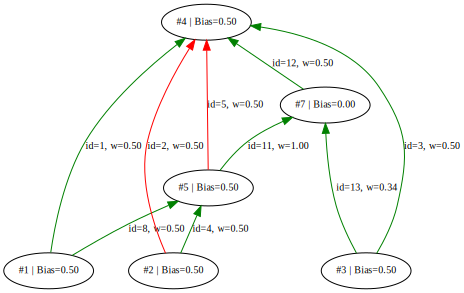

In [95]:
visualize_genome(p1_g)

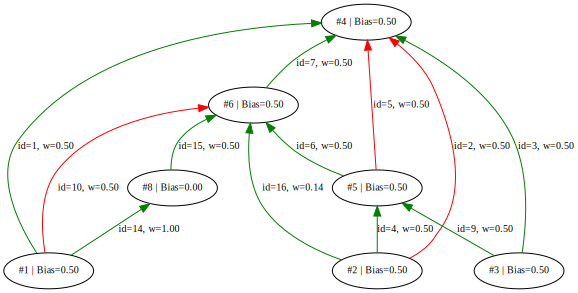

In [96]:
visualize_genome(p2_g)

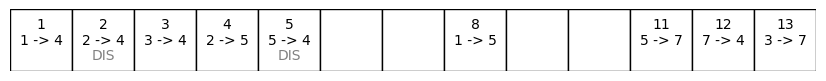

In [97]:
display_gene(p1_g.synapse_gene)

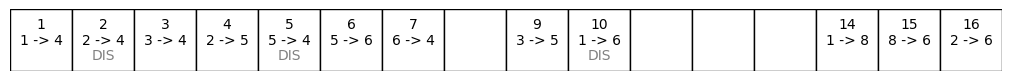

In [98]:
display_gene(p2_g.synapse_gene)

In [102]:
p1_g.fitness, p2_g.fitness = 1, 0

f_1 = nn.NetworkGenome.from_crossover(p1_g, p2_g)

[[NeuronGene 5] Bias: 0.5, [NeuronGene 7] Bias: 0]


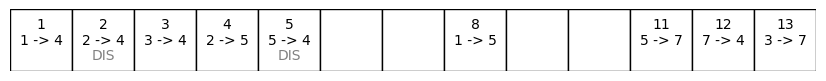

In [103]:
display_gene(f_1.synapse_gene)

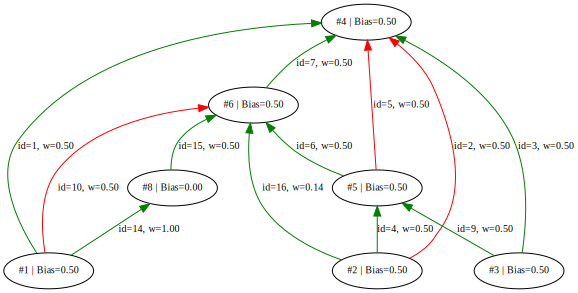

In [101]:
visualize_genome(f_1)

In [97]:
a.forward()

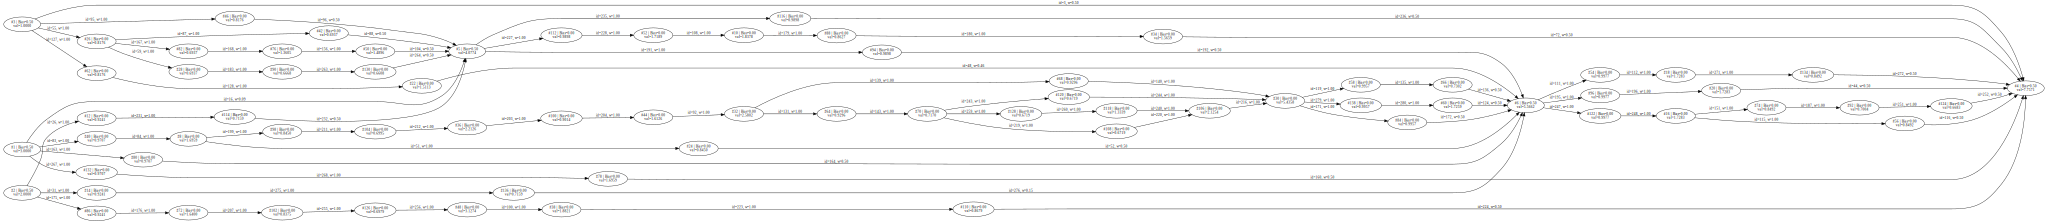

In [98]:
visualize_net(a)